In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
df = pd.read_csv('/content/credit_risk_dataset.csv')


In [ ]:
# Display the first few rows to understand the dataset
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Check for missing values
print(df.isnull().sum())


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [ ]:
# Fill missing values in 'person_emp_length' and 'loan_int_rate' with median
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())



In [ ]:
df.isnull().sum()


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
# Check for duplicates and drop if any
print(f'Duplicate entries: {df.duplicated().sum()}')
df = df.drop_duplicates()


Duplicate entries: 165


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.768880,9593.845632,11.014662,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.090411,6322.730241,3.083050,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


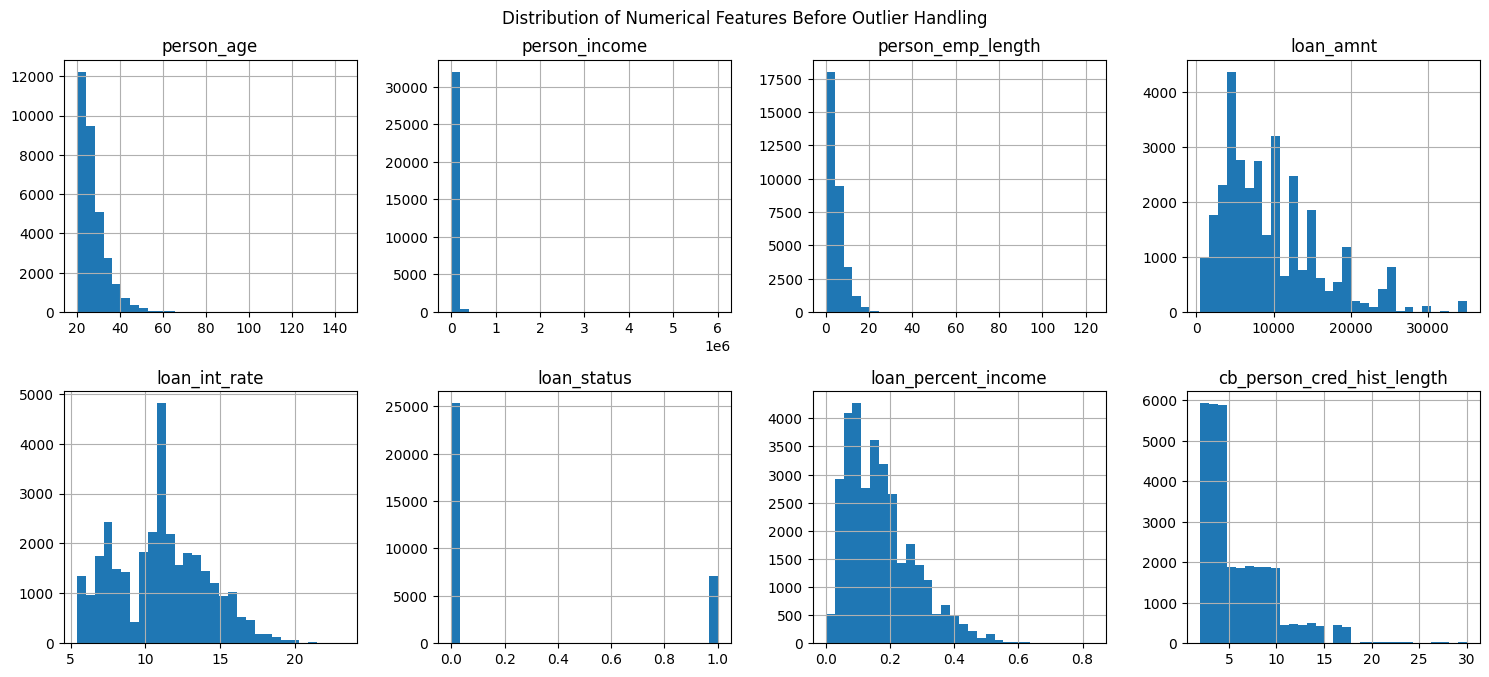

In [ ]:
# Visualize the distribution of numerical features before handling outliers
df.hist(bins=30, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribution of Numerical Features Before Outlier Handling')
plt.tight_layout()
plt.show()


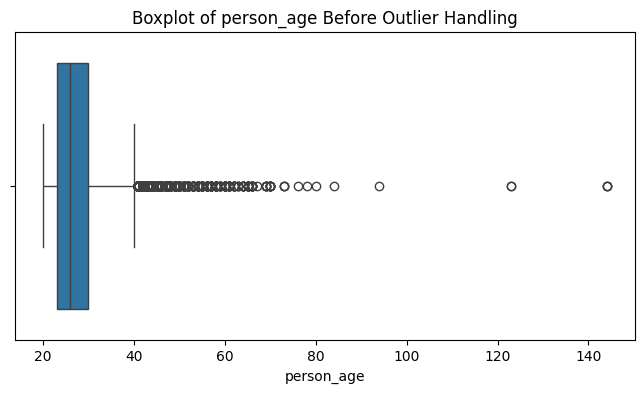

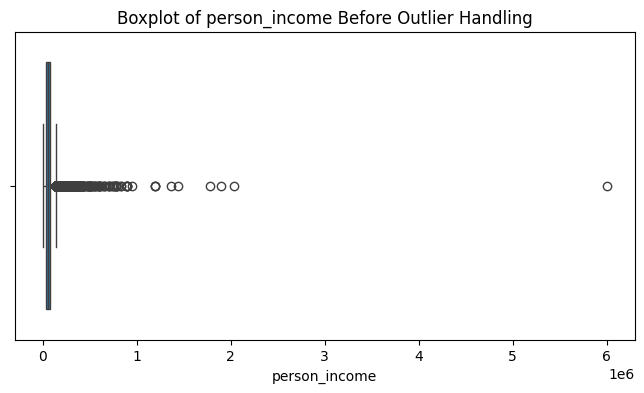

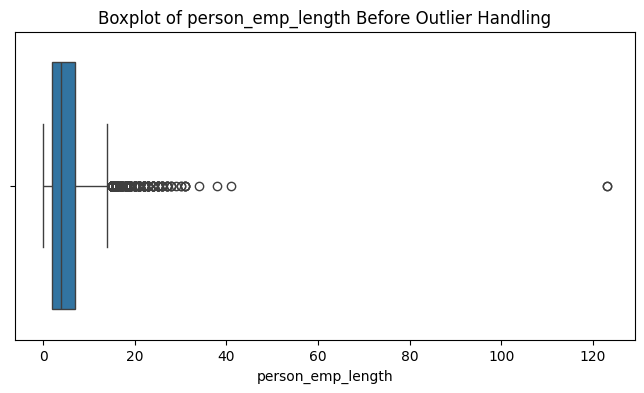

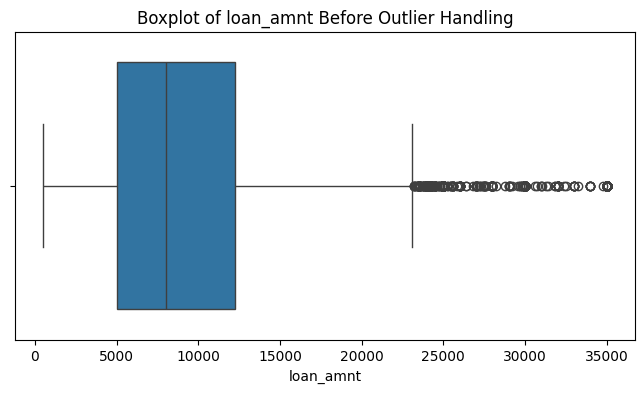

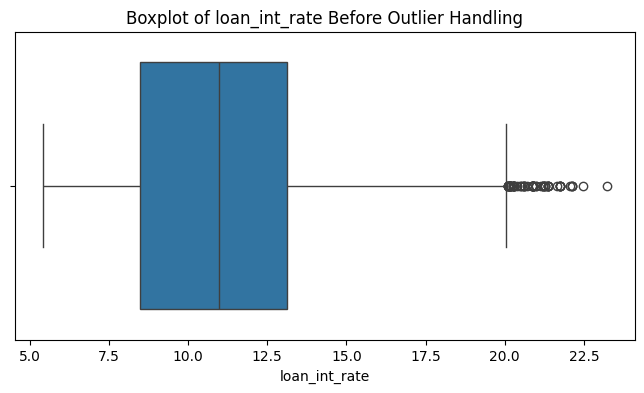

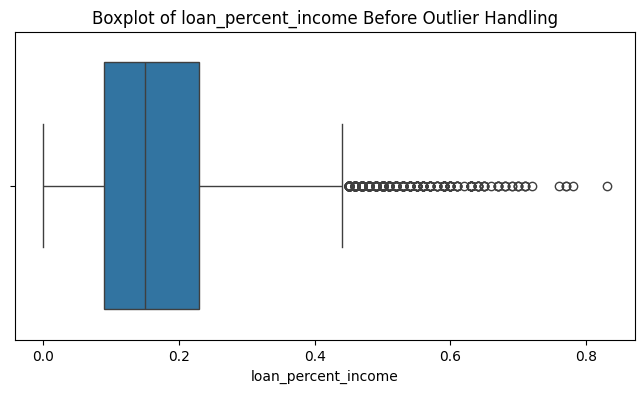

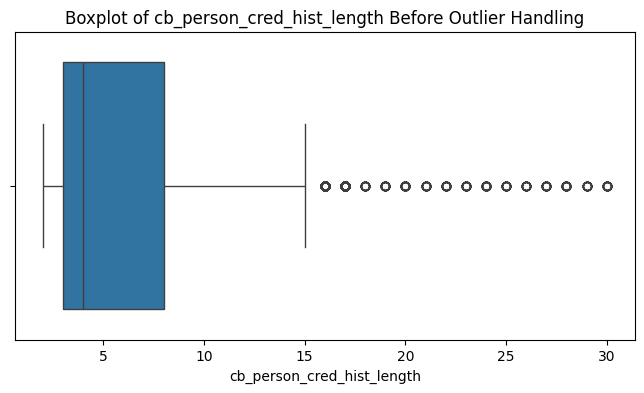

In [ ]:
# Box plots for numerical features to visualize outliers
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature} Before Outlier Handling')
    plt.show()


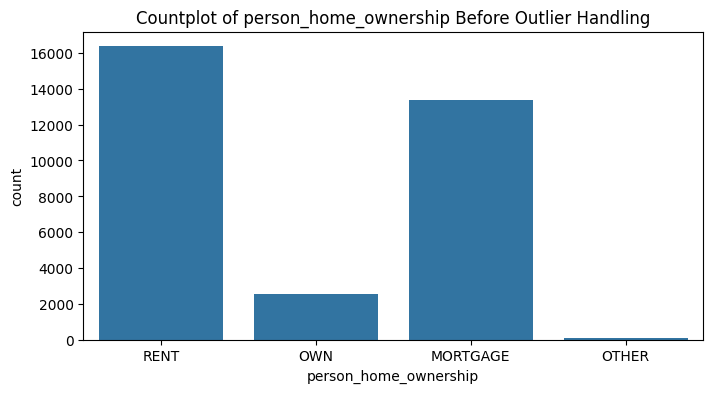

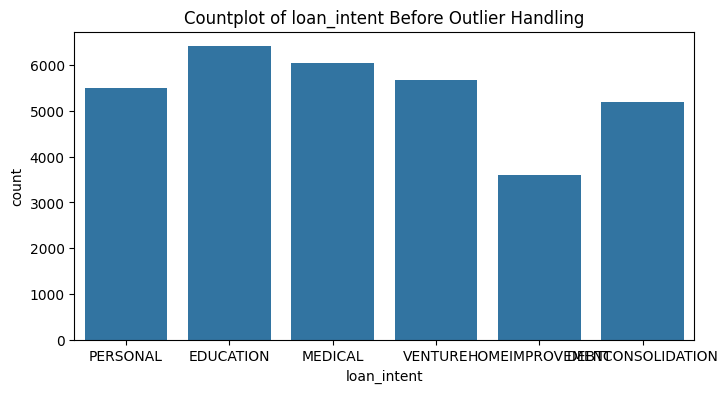

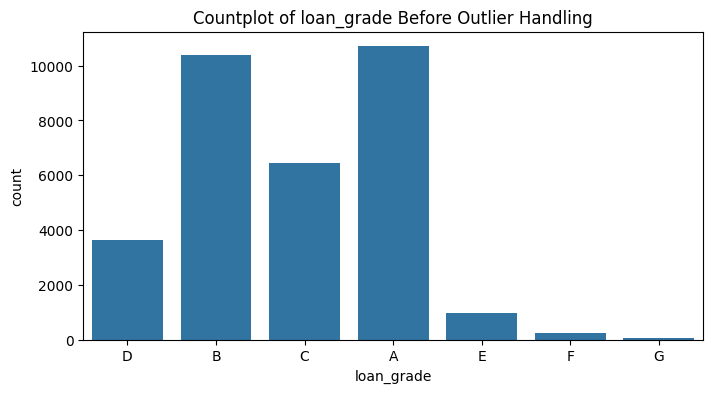

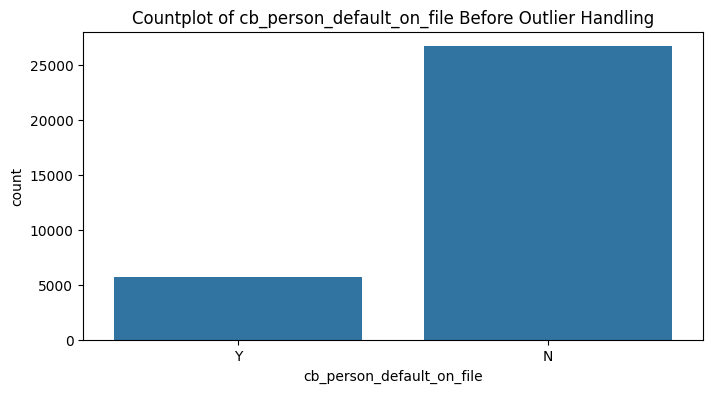

In [ ]:
# Visualize categorical features before handling outliers
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[feature])
    plt.title(f'Countplot of {feature} Before Outlier Handling')
    plt.show()


In [ ]:
# Encode ordinal features using Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ordinal_features = ['loan_grade']
le = LabelEncoder()
for feature in ordinal_features:
    df[feature] = le.fit_transform(df[feature])



In [ ]:
# One-Hot Encode nominal features
nominal_features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)


In [ ]:

# Ensure all features are now numeric
print(df.dtypes)


person_age                       int64
person_income                    int64
person_emp_length              float64
loan_grade                       int64
loan_amnt                        int64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_cred_hist_length       int64
person_home_ownership_OTHER       bool
person_home_ownership_OWN         bool
person_home_ownership_RENT        bool
loan_intent_EDUCATION             bool
loan_intent_HOMEIMPROVEMENT       bool
loan_intent_MEDICAL               bool
loan_intent_PERSONAL              bool
loan_intent_VENTURE               bool
cb_person_default_on_file_Y       bool
dtype: object


In [ ]:
# Outlier detection and removal using IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [ ]:
# Remove outliers
df = remove_outliers_iqr(df, numerical_features)


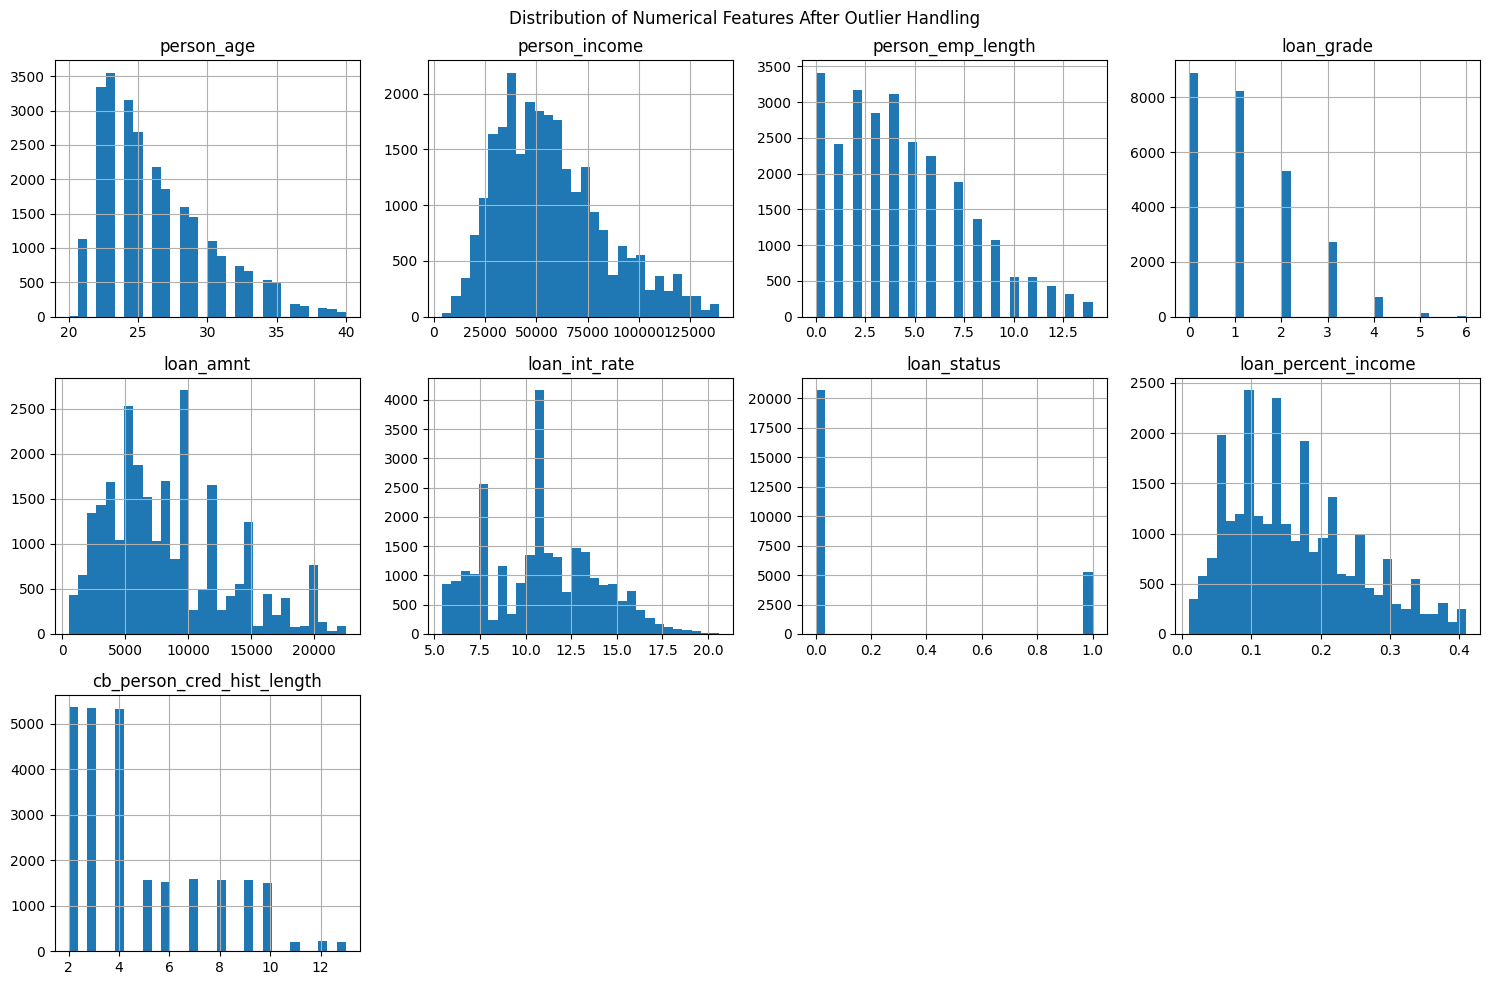

In [ ]:
# Visualize the distribution of numerical features after handling outliers
df.hist(bins=30, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribution of Numerical Features After Outlier Handling')
plt.tight_layout()
plt.show()



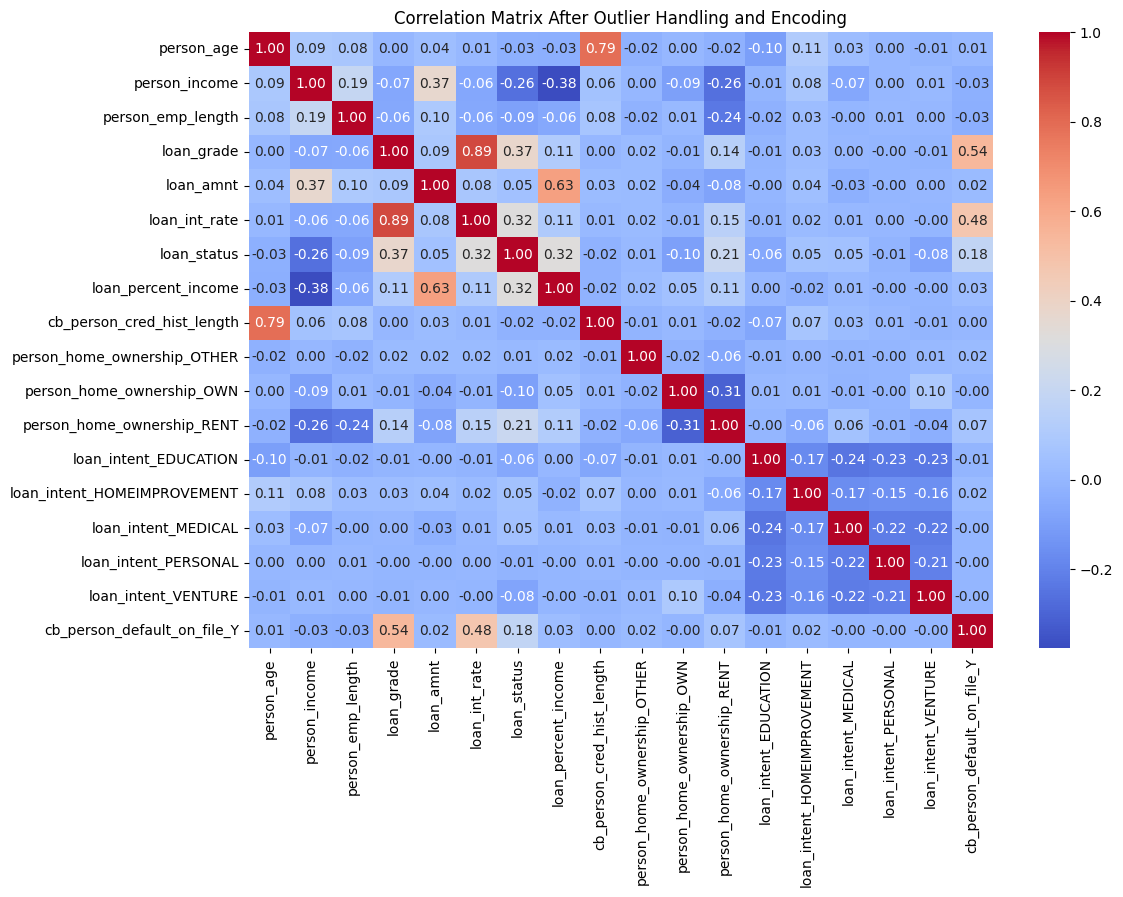

In [ ]:
# Correlation analysis with a heatmap after handling outliers and encoding
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix After Outlier Handling and Encoding')
plt.show()


In [ ]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
# Handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=7)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

Model: Logistic Regression
Model Accuracy  78.17%
Model F1 Score  78.45%
Model Precision  78.47%
Model Recall  78.43%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      6134
           1       0.78      0.78      0.78      6301

    accuracy                           0.78     12435
   macro avg       0.78      0.78      0.78     12435
weighted avg       0.78      0.78      0.78     12435



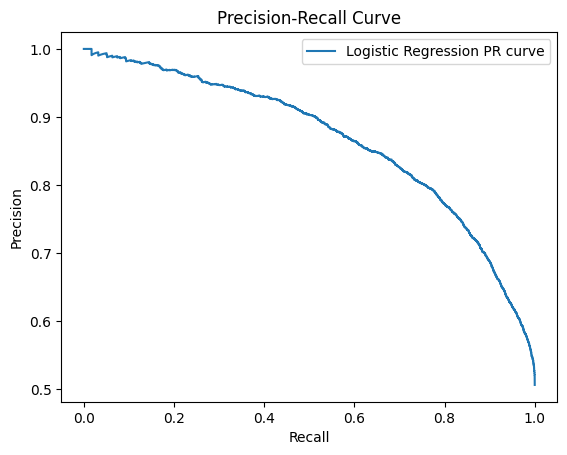

In [ ]:
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve

model_logist = LogisticRegression()
model_logist.fit(X_train, y_train)
y_pred_log = model_logist.predict(X_test)
print('Model: Logistic Regression')
print('Model Accuracy ',"{:.2%}".format(accuracy_score(y_test, y_pred_log)))
print('Model F1 Score ',"{:.2%}".format(f1_score(y_test, y_pred_log)))
print('Model Precision ',"{:.2%}".format(precision_score(y_test, y_pred_log)))
print('Model Recall ',"{:.2%}".format(recall_score(y_test, y_pred_log)))


# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


# Plot Precision-Recall curve
precision_log, recall_log, _ = precision_recall_curve(y_test, model_logist.predict_proba(X_test)[:, 1])
plt.plot(recall_log, precision_log, label='Logistic Regression PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Model: Decision Tree
Model Accuracy: 89.18%
Model F1 Score: 89.40%
Model Precision: 88.69%
Model Recall: 90.13%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      6134
           1       0.89      0.90      0.89      6301

    accuracy                           0.89     12435
   macro avg       0.89      0.89      0.89     12435
weighted avg       0.89      0.89      0.89     12435



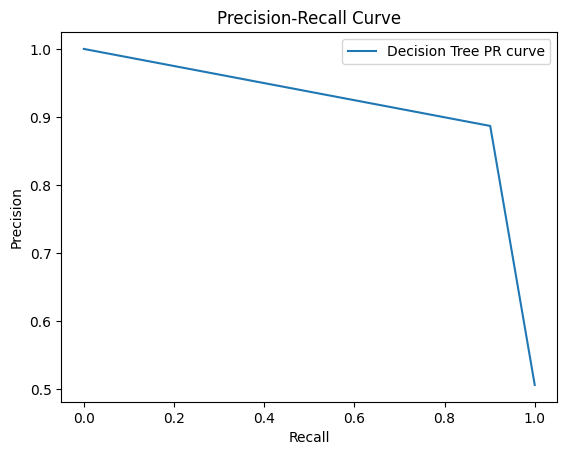

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_dec_tree = decision_tree.predict(X_test)

# Print evaluation metrics
print('Model: Decision Tree')
print('Model Accuracy:', "{:.2%}".format(accuracy_score(y_test, y_pred_dec_tree)))
print('Model F1 Score:', "{:.2%}".format(f1_score(y_test, y_pred_dec_tree)))
print('Model Precision:', "{:.2%}".format(precision_score(y_test, y_pred_dec_tree)))
print('Model Recall:', "{:.2%}".format(recall_score(y_test, y_pred_dec_tree)))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dec_tree))

# Plot Precision-Recall curve
precision_dec_tree, recall_dec_tree, _ = precision_recall_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
plt.plot(recall_dec_tree, precision_dec_tree, label='Decision Tree PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



Model: Random Forest
Model Accuracy: 94.39%
Model F1 Score: 94.27%
Model Precision: 97.56%
Model Recall: 91.21%


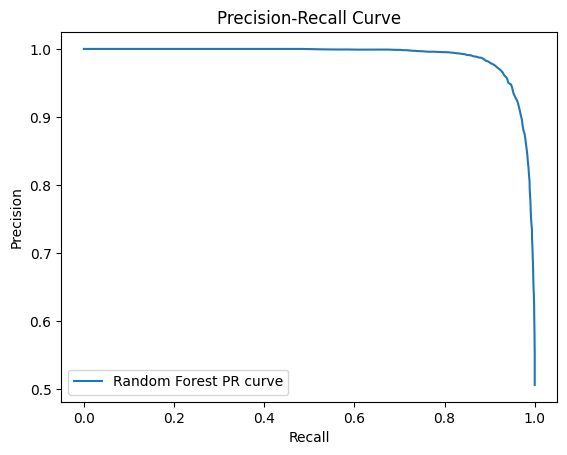

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = random_forest.predict(X_test)

# Print evaluation metrics
print('Model: Random Forest')
print('Model Accuracy:', "{:.2%}".format(accuracy_score(y_test, y_pred_rf)))
print('Model F1 Score:', "{:.2%}".format(f1_score(y_test, y_pred_rf)))
print('Model Precision:', "{:.2%}".format(precision_score(y_test, y_pred_rf)))
print('Model Recall:', "{:.2%}".format(recall_score(y_test, y_pred_rf)))

# Plot Precision-Recall curve
precision_rand_forest, recall_rand_forest, _ = precision_recall_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
plt.plot(recall_rand_forest, precision_rand_forest, label='Random Forest PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 5.1. Logistic Regression Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\n" + "="*60 + "\n")

# 5.2. Random Forest Evaluation
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\n" + "="*60 + "\n")

# 5.3. Decision Tree Evaluation
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dec_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dec_tree))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      6134
           1       0.78      0.78      0.78      6301

    accuracy                           0.78     12435
   macro avg       0.78      0.78      0.78     12435
weighted avg       0.78      0.78      0.78     12435

Confusion Matrix:
[[4778 1356]
 [1359 4942]]


Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      6134
           1       0.98      0.91      0.94      6301

    accuracy                           0.94     12435
   macro avg       0.95      0.94      0.94     12435
weighted avg       0.95      0.94      0.94     12435

Confusion Matrix:
[[5990  144]
 [ 554 5747]]


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6134
           1       0.89      0.90      0.89      6301

    accuracy    

**Best Model**: The Random Forest model is the best-performing model among the three, with the highest accuracy (0.94), precision, recall
and F1-scores. It is particularly effective in correctly classifying both classes with minimal false positives and false negatives.


In [ ]:
!pip install joblib
!pip install flask


In [ ]:
import joblib

# Save the best model (Random Forest in this case)
joblib.dump(random_forest, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

In [ ]:
# Load the saved model
model = joblib.load('best_random_forest_model.pkl')


In [ ]:
def predict_credit_risk(input_data):
    # Assume input_data is a dictionary with the necessary features
    df_input = pd.DataFrame([input_data])

    # Ensure that the input data is scaled and processed like the training data
    df_input[numerical_features] = scaler.transform(df_input[numerical_features])

    # Make a prediction using the loaded model
    prediction = model.predict(df_input)
    return prediction[0]


In [ ]:
# Example input data
input_data = {
    'person_age': 35,
    'person_income': 50000,
    'person_emp_length': 10,
    'loan_amnt': 20000,
    'loan_int_rate': 0.15,
    'loan_percent_income': 0.4,
    'cb_person_cred_hist_length': 3,
    'loan_grade': 2,  # Assuming loan_grade was encoded
    'person_home_ownership_Rent': 1,
    'loan_intent_Education': 0,
    'cb_person_default_on_file_Y': 0
}

def prepare_input_data(input_data, trained_columns):
    # Create an empty DataFrame with the trained columns
    df_input = pd.DataFrame([input_data])

    # Add any missing columns with zeros (for one-hot encoded features not present in input)
    for col in trained_columns:
        if col not in df_input.columns:
            df_input[col] = 0

    # Reorder columns to match the trained columns
    df_input = df_input[trained_columns]

    return df_input

# Assuming these are the columns used during training
trained_columns = X.columns  # Replace with the actual columns from your model training

# Prepare the input data
df_input = prepare_input_data(input_data, trained_columns)

# Scale the numerical features
df_input[numerical_features] = scaler.transform(df_input[numerical_features])

# Make the prediction
prediction = model.predict(df_input)
prediction_proba = model.predict_proba(df_input)

# Map prediction to risk category
if prediction[0] == 0:
    risk_category = "No Default (Low Risk)"
else:
    risk_category = "Default (High Risk)"

# Output the results
print('Prediction:', prediction)
print('Prediction Probability:', prediction_proba)
print('Risk Category:', risk_category)


Prediction: [0]
Prediction Probability: [[0.77 0.23]]
Risk Category: No Default (Low Risk)
